In [1]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

from muon_hardware.analysis import muon_lifetime
from muon_hardware.utils import exp

from scipy.signal import savgol_filter

In [2]:
# Amplifier

# Load the data
file = "data/acquisitio_spectrum_weekend_63h53-25-09-2023.txt"

# These parameters have been defined in another notebook
Object = muon_lifetime(file)
binned_data_ampli = Object.rebin_hist(bins = 300)
popt, perr = Object.exp_fit(x_cut=2.5)

# Smooth the curve
smoothed_data_ampli = savgol_filter(binned_data_ampli[:,1], 51, 3)
popt

<ValueView amplitude=255.82261021467946 tau=2.139990419862457>

In [3]:
# Delay Line Amplifier

file = "data/acquisition_spectrum_12h07-27-09-2023.txt"

Object = muon_lifetime(file)
binned_data_dla = Object.rebin_hist(bins = 60)
popt, perr = Object.exp_fit(x_cut=1)

# Smooth the curve
smoothed_data_dla = savgol_filter(binned_data_dla[:,1], 5, 2)
popt

<ValueView amplitude=100.14644265563366 tau=2.238072081372722>

In [4]:
file = "data/acquisition_spectrum_TFA_21h55-28-09-2023.txt"

Object = muon_lifetime(file)
binned_data_tfa = Object.rebin_hist(bins = 300)
popt, perr = Object.exp_fit(x_cut=1.8)

# Smooth the curve
smoothed_data_tfa = savgol_filter(binned_data_tfa[:,1], 5, 2)
popt

<ValueView amplitude=84.18582263949966 tau=2.0169171153355325>

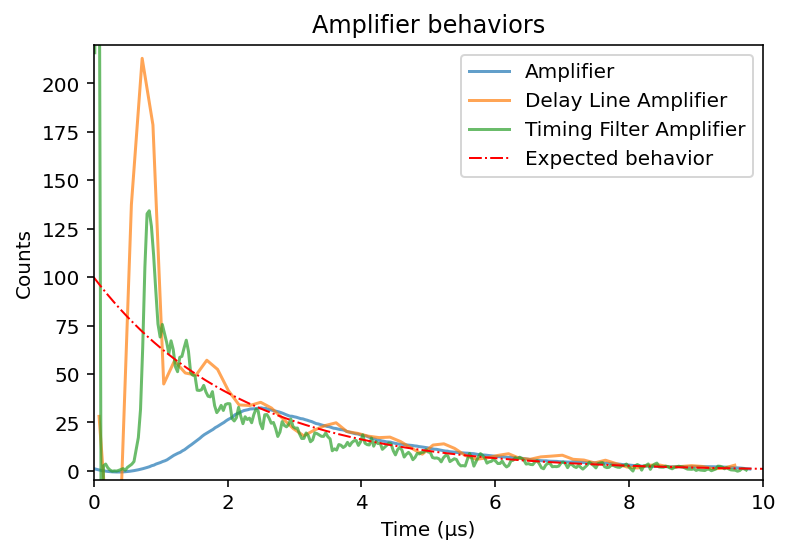

In [5]:
# Plot the smoothed curve and the exponantial fit

# get the x range
x = np.linspace(0, 10, 1000)

plt.plot(binned_data_ampli[:,0], smoothed_data_ampli/2.25, label="Amplifier", alpha=0.7)
plt.plot(binned_data_dla[:,0], smoothed_data_dla, label="Delay Line Amplifier", alpha=0.7)
plt.plot(binned_data_tfa[:,0], smoothed_data_tfa, label="Timing Filter Amplifier", alpha=0.7)
plt.plot(x, exp(x, 100, 2.2), label="Expected behavior", ls="-.", color='red', lw=1)

plt.xlim(0, 10)
plt.ylim(-4.5 ,220)

plt.xlabel("Time (µs)")
plt.ylabel("Counts")
plt.title("Amplifier behaviors")
plt.legend()
plt.gcf().set_facecolor("white");